In [1]:
import scipy as sp
import numpy as np
import time

try:
    from localgraphclustering import *
except:
    # when the package is not installed, import the local version instead. 
    # the notebook must be placed in the original "notebooks/" folder
    sys.path.append("../")
    from localgraphclustering import *
    
from graph_tool.all import * 

import time

## Load data

In [2]:
g = GraphLocal('datasets/JohnsHopkins.graphml','graphml')

/usr/local/lib/python3.7/site-packages/localgraphclustering/GraphLocal.py:217: UserWarning:

Loading a graphml is not efficient, we suggest using an edgelist format for this API.



## Example on how to find all clusters in graph using local graph clustering

In [3]:
start = time.time()
# Compute the embeddings X and the pairwise distance matrix Z.
X,Z = compute_all_embeddings_and_distances(g,rho_list=[1.0e-5,1.0e-1],nsamples_from_rho=1,njobs=6)
end = time.time()
print(end - start)

17.33543086051941


In [4]:
start = time.time()
# Find the clusters
labels = compute_clusters_given_distance(nclusters=4,Z=Z)
end = time.time()
print(end - start)

1.0218868255615234


## Visualize the output

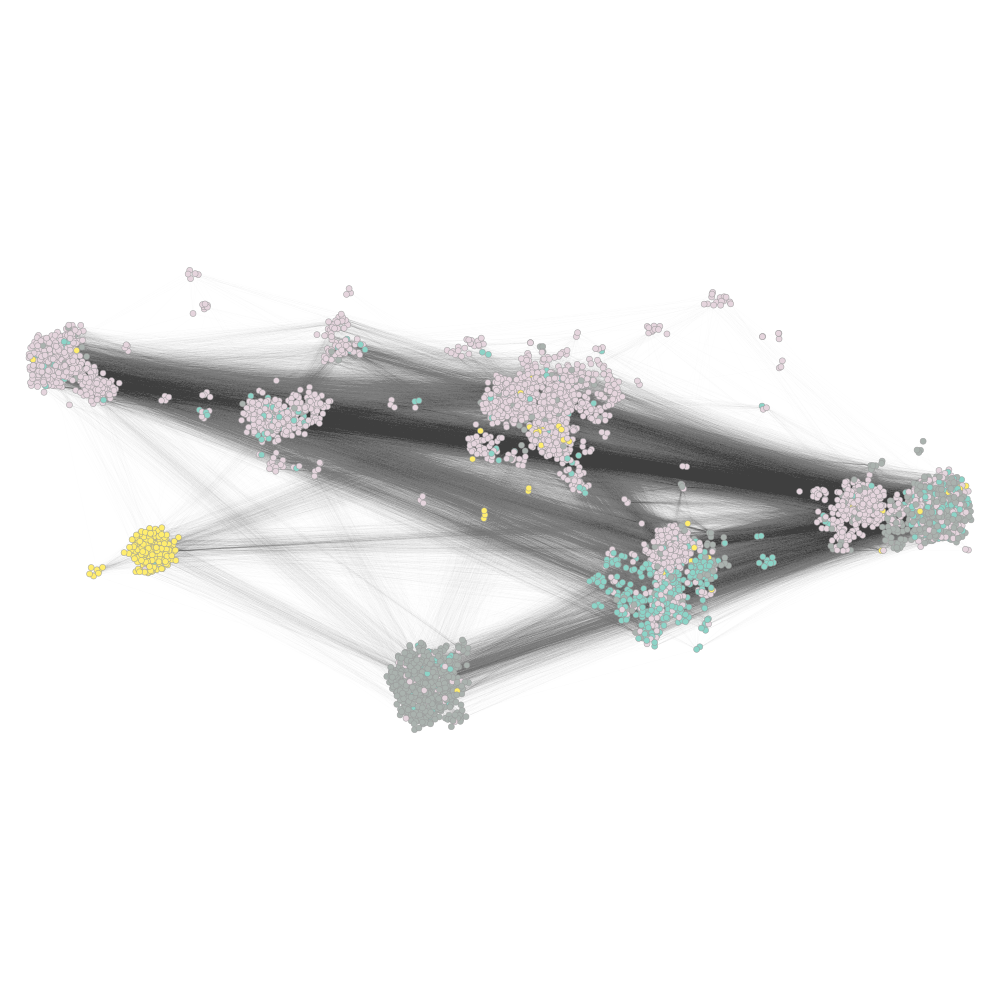

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x14af9efd0, at 0x12d581ef0>

In [5]:
g_gtool = load_graph('datasets/JohnsHopkins.graphml')
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])

pos = g_gtool.new_vertex_property("vector<double>")
for i in range(g_gtool.num_vertices()):
    pos[i] = ld_coord[idx[i],1:3]
    
n = g._num_vertices

temp = np.zeros(n)
temp = temp + 3

temp2 = np.zeros(n, dtype=int)

counter = 0

for i in range(n):
        
    temp[i] = 6
    temp2[i] = labels[i] 

node_size = g_gtool.new_vertex_property("double",temp)

node_colours = g_gtool.new_vertex_property("int",temp2)

graph_draw(g_gtool, pos, output_size=(1000, 1000),
            vertex_size=node_size, 
            vertex_fill_color=node_colours,
            edge_pen_width=0.1,
            edge_color = [0.0, 0, 0, 0.05]
            )

## Another example

In [6]:
# This example computes the embeddings and the clusters in one function. It is not recommended when we want to experiment
# with multiple parameters nclusters. Look at the fist example above for a faster approach.
labels = find_clusters(g,nclusters=4,rho_list=[1.0e-5,1.0e-1],nsamples_from_rho=1,njobs=6)

## Visualize the output

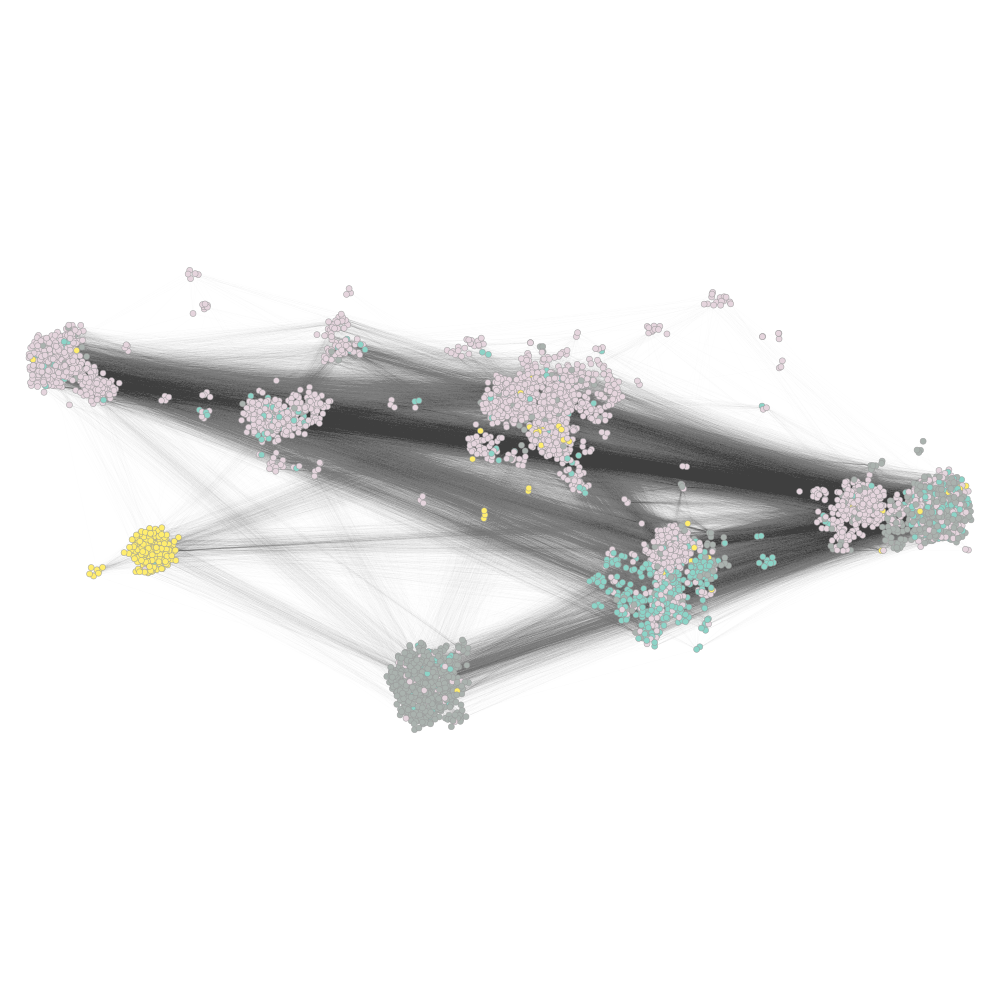

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x13c64a7f0, at 0x12d581dd8>

In [7]:
g_gtool = load_graph('datasets/JohnsHopkins.graphml')
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])

pos = g_gtool.new_vertex_property("vector<double>")
for i in range(g_gtool.num_vertices()):
    pos[i] = ld_coord[idx[i],1:3]
    
n = g._num_vertices

temp = np.zeros(n)
temp = temp + 3

temp2 = np.zeros(n, dtype=int)

counter = 0

for i in range(n):
        
    temp[i] = 6
    temp2[i] = labels[i] 

node_size = g_gtool.new_vertex_property("double",temp)

node_colours = g_gtool.new_vertex_property("int",temp2)

graph_draw(g_gtool, pos, output_size=(1000, 1000),
            vertex_size=node_size, 
            vertex_fill_color=node_colours,
            edge_pen_width=0.1,
            edge_color = [0.0, 0, 0, 0.05]
            )

## Segment the graph

In [8]:
start = time.time()
# Compute the embeddings X and the pairwise distance matrix Z.
labels, info = graph_segmentation(g,rho_list=[1.0e-5,1.0e-1],alpha=0.1,nsamples_from_rho=1,njobs=6)
end = time.time()
print(end - start)

15.838661909103394


In [9]:
X, Z = compute_embeddings_and_distances_from_region_adjacency(g,info,n_jobs=6)

In [10]:
labels = compute_clusters_from_region_adjacency(g,4,Z,info)

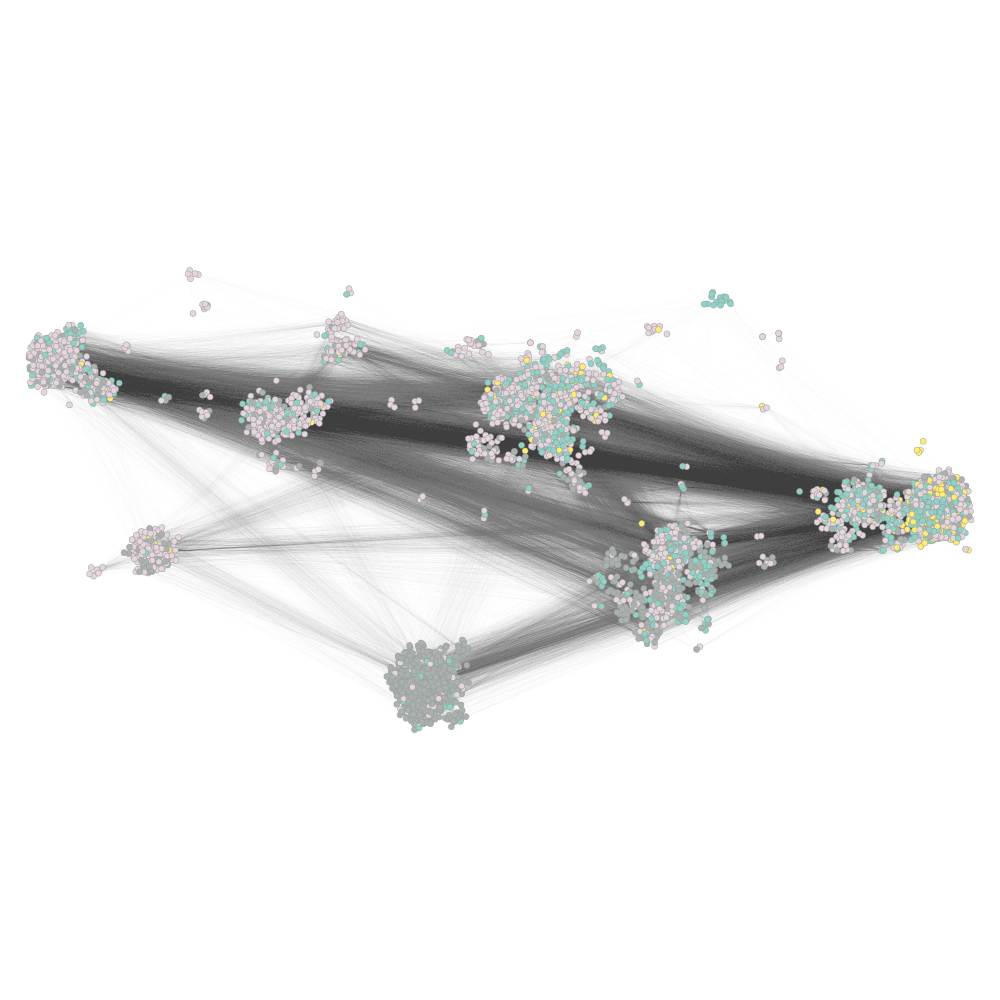

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x13c64a860, at 0x13c714ac8>

In [11]:
g_gtool = load_graph('datasets/JohnsHopkins.graphml')
remove_self_loops(g_gtool)

# Load pre-computed coordinates for nodes.
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])

pos = g_gtool.new_vertex_property("vector<double>")
for i in range(g_gtool.num_vertices()):
    pos[i] = ld_coord[idx[i],1:3]
    
n = g._num_vertices

temp = np.zeros(n)
temp = temp + 3

temp2 = np.zeros(n, dtype=int)

counter = 0

for i in range(n):
        
    temp[i] = 6
    temp2[i] = labels[i] 

node_size = g_gtool.new_vertex_property("double",temp)

node_colours = g_gtool.new_vertex_property("int",temp2)

graph_draw(g_gtool, pos, output_size=(1000, 1000),
            vertex_size=node_size, 
            vertex_fill_color=node_colours,
            edge_pen_width=0.1,
            edge_color = [0.0, 0, 0, 0.05]
            )